# Задача 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [113]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


**Математический расчет коэффециентов линейнор регрессии.**

In [114]:
zp = np.array ([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
ks = np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


In [115]:
zp = zp.reshape((10,1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [116]:
ks = zp.reshape((10,1))
ks

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [117]:
B = np.dot(np.linalg.inv(np.dot(zp.T,zp)),zp.T @ ks)
B

array([[1.]])

In [109]:
zp = np.hstack([np.ones((10,1)),zp])
zp

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [110]:
B = np.dot(np.linalg.inv(np.dot(zp.T,zp)),zp.T @ ks)
B

array([444.17735732,   2.62053888])

**Расчет коэффециента регрессии.**

In [104]:
zp = np.array ([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
ks = np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
np.corrcoef (zp, ks)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [105]:
zp = zp.reshape(10,1)
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [106]:
model = LinearRegression()
model.fit(zp, ks)
r_sq = model.score(zp, ks)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 444.1773573243595
slope: [2.62053888]


In [107]:
model = LinearRegression()
model.fit(zp, ks)
r_sq = model.score(zp, ks)
print('slope:', model.coef_)

slope: [2.62053888]


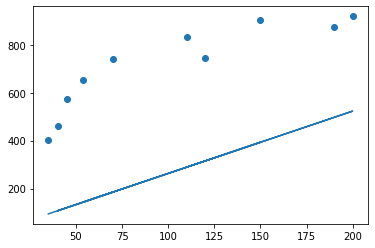

In [108]:
plt.scatter(zp, ks)
plt.plot(zp, 3+2.6*zp)
plt.show()

#Задача 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [118]:
zp = np.array ([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) 
ks = np.array ([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


In [122]:
def mse_(B1, ks = ks, zp = zp, n = 10):
  return np.sum((B1*zp - ks)**2/n)

alpha = 1e-6

B1 =0.1 

n = 10

In [123]:
for i in range(10):
  B1 -= alpha *(2/n) * np.sum ((B1 * zp -ks) * zp)
  print ('B1 = {}'.format(B1))

B1 = 0.25952808
B1 = 0.414660650906144
B1 = 0.5655188230595969
B1 = 0.7122203698240712
B1 = 0.8548798195302346
B1 = 0.9936085448867542
B1 = 1.1285148499277806
B1 = 1.2597040545647504
B1 = 1.387278576808517
B1 = 1.5113380127259965


In [124]:
for i in range(3000):
  B1 -= alpha *(2/n) * np.sum ((B1 * zp -ks) * zp)
  if i % 500 ==0:
    print ('Iteranion = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteranion = 0, B1 = 1.6319792141937546, mse = 306275.75680400355
Iteranion = 500, B1 = 5.889816771625289, mse = 56516.858415902796
Iteranion = 1000, B1 = 5.8898204201295625, mse = 56516.858415719405
Iteranion = 1500, B1 = 5.889820420132673, mse = 56516.85841571942
Iteranion = 2000, B1 = 5.889820420132673, mse = 56516.85841571942
Iteranion = 2500, B1 = 5.889820420132673, mse = 56516.85841571942


In [125]:
#посчитаем mse через записанную ранее функцию и убедимся, что они одинаковые
mse_(5.8898)

56516.858421464